### Full test of workflow to calculate features

In [2]:
import pandas as pd
import numpy as np
from Feature_calc_functions import *
import time

#### Load the dataset and do preprocessing

The loadAllSubjects function does the following
- Adds a column called 'subject', which contains the subject ID
- Interpolates across NaNs
- Removes segments of data at the start and end of each activity
- Drops any remaining NaNs
- Resets the index of the dataframe

In [19]:
protocol_datadir = "/Users/rmartinshort/Documents/Berkeley/GDSO/PAMAP2_data/PAMAP2_Dataset/Protocol"
optional_datadir = "/Users/rmartinshort/Documents/Berkeley/GDSO/PAMAP2_data/PAMAP2_Dataset/Optional"

In [20]:
all_data_protocol = loadAllSubjects(protocol_datadir)

Subject 3: Duration of activity 0.000000 not long enough to redact data
Subject 4: Duration of activity 5.000000 not long enough to redact data
Subject 6: Duration of activity 24.000000 not long enough to redact data
Subject 7: Duration of activity 0.000000 not long enough to redact data
Subject 9: Duration of activity 0.000000 not long enough to redact data
Subject 9: Duration of activity 0.000000 not long enough to redact data


In [21]:
all_data_optional = loadAllSubjects(optional_datadir)

Subject 6: Duration of activity 0.000000 not long enough to redact data
Subject 8: Duration of activity 0.000000 not long enough to redact data
Subject 8: Duration of activity 0.000000 not long enough to redact data
Subject 9: Duration of activity 0.000000 not long enough to redact data


In [22]:
all_data = pd.concat([all_data_protocol,all_data_optional])

Write to file for ease of loading next time

#### Saves time loading if we want to rerun this notebook

In [23]:
all_data.to_csv("All_subject_data.csv",index=False)

In [3]:
all_data = pd.read_csv("All_subject_data.csv")

#### Do final preprocessing

The select_data_to_process function does the following

- Removes columns we know will not be useful
- Removes activity 0 

In [4]:
all_data = select_data_to_process(all_data)

#### Calculate features (may take a long time)

In [50]:
st = time.time()
feature_df = calculate_features(all_data,sliding_window_length=512,sliding_window_offset=513)
ed = time.time()


-------------------------------
Subject 1.0
[(0, 25186), (25187, 46666), (46667, 66383), (66384, 87956), (87957, 108897), (108898, 115017), (115018, 120497), (120498, 126267), (126268, 131686), (131687, 151939), (151940, 170204), (170205, 191779), (191780, 211044), (211045, 221956), (221957, 274475), (274476, 356121), (356122, 408210), (408211, 433325)]
Activity 1.000000
Length of slice in samples: 25187
Number of feature calculations to be done: 48
Activity 2.000000
Length of slice in samples: 21480
Number of feature calculations to be done: 40
Activity 3.000000
Length of slice in samples: 19717
Number of feature calculations to be done: 37
Activity 17.000000
Length of slice in samples: 21573
Number of feature calculations to be done: 41
Activity 16.000000
Length of slice in samples: 20941
Number of feature calculations to be done: 39
Activity 12.000000
Length of slice in samples: 6120
Number of feature calculations to be done: 10
Activity 13.000000
Length of slice in samples: 5480
N

In [36]:
print(ed-st)

24.178977966308594


In [62]:
feature_df.to_csv("Test_feature_df.csv",index=False)

#### Only takes 120 seconds to calculate features for the database. Will take longer once more complex features are added 

### Now we can do some exploration of the feature timeseries 

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline 

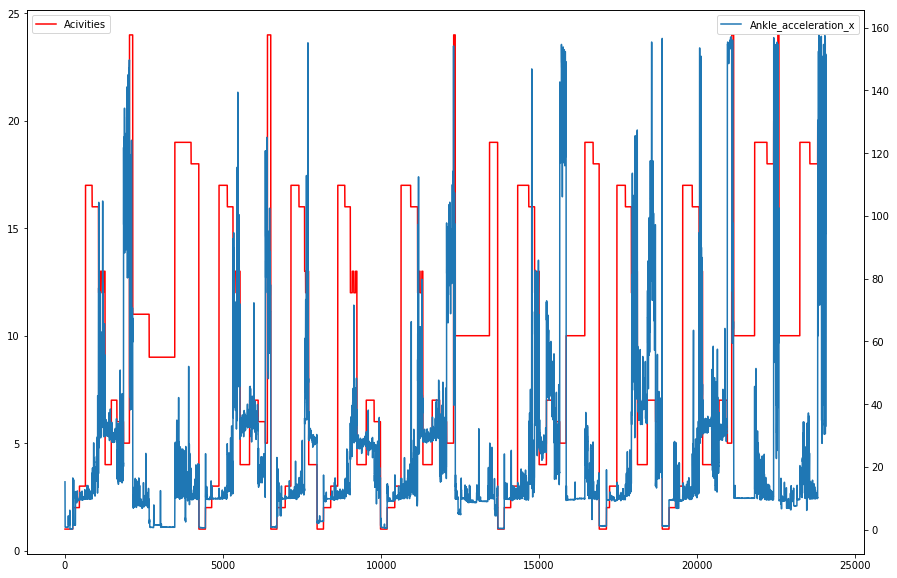

In [11]:
fig, ax1 = plt.subplots(figsize=(15,10))
X = np.array(feature_df.index)
Y1 = feature_df['activityID_mean'].values
Y2 = feature_df['ankle_acc16g_x_peak'].values
ax1.plot(X,Y1,'r-',label='Acivities')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.plot(X,Y2,label='Ankle_acceleration_x')
ax2.legend(loc='upper right')

We can see that the activity pattern across subjects is quite similar. But the plot is too zoomed out for us to see much of how this feature changes with activity. For that, lets look in more detail at one of the subjects

#### How many samples in each activity?

In [50]:
feature_df.dropna(inplace=True)

In [51]:
for activityID_val in feature_df['activityID_mean'].unique():
    print('Activity %i. Count: %i'%(activityID_val, len(feature_df[feature_df['activityID_mean']==activityID_val])))

Activity 1. Count: 1720
Activity 2. Count: 1647
Activity 3. Count: 1695
Activity 17. Count: 2181
Activity 16. Count: 1549
Activity 12. Count: 763
Activity 13. Count: 614
Activity 4. Count: 2185
Activity 7. Count: 1702
Activity 6. Count: 1465
Activity 5. Count: 829
Activity 24. Count: 363
Activity 11. Count: 520
Activity 9. Count: 811
Activity 19. Count: 1743
Activity 18. Count: 897
Activity 10. Count: 2997
Activity 20. Count: 393


#### Here's a list of all the feature columns we have

In [12]:
list(feature_df.columns)

['timestamp_mean',
 'activityID_mean',
 'heart_rate_mean',
 'hand_temp_mean',
 'hand_acc16g_x_mean',
 'hand_acc16g_y_mean',
 'hand_acc16g_z_mean',
 'hand_gyro_x_mean',
 'hand_gyro_y_mean',
 'hand_gyro_z_mean',
 'chest_temp_mean',
 'chest_acc16g_x_mean',
 'chest_acc16g_y_mean',
 'chest_acc16g_z_mean',
 'chest_gyro_x_mean',
 'chest_gyro_y_mean',
 'chest_gyro_z_mean',
 'ankle_temp_mean',
 'ankle_acc16g_x_mean',
 'ankle_acc16g_y_mean',
 'ankle_acc16g_z_mean',
 'ankle_gyro_x_mean',
 'ankle_gyro_y_mean',
 'ankle_gyro_z_mean',
 'subject_mean',
 'heart_rate_median',
 'hand_temp_median',
 'hand_acc16g_x_median',
 'hand_acc16g_y_median',
 'hand_acc16g_z_median',
 'hand_gyro_x_median',
 'hand_gyro_y_median',
 'hand_gyro_z_median',
 'chest_temp_median',
 'chest_acc16g_x_median',
 'chest_acc16g_y_median',
 'chest_acc16g_z_median',
 'chest_gyro_x_median',
 'chest_gyro_y_median',
 'chest_gyro_z_median',
 'ankle_temp_median',
 'ankle_acc16g_x_median',
 'ankle_acc16g_y_median',
 'ankle_acc16g_z_median'

In [17]:
len(list(feature_df.columns))

91

In [13]:
subject_1 = feature_df[feature_df['subject_mean']==1]

In [14]:
subject_1.head()

,timestamp_mean,activityID_mean,heart_rate_mean,hand_temp_mean,hand_acc16g_x_mean,hand_acc16g_y_mean,hand_acc16g_z_mean,hand_gyro_x_mean,hand_gyro_y_mean,hand_gyro_z_mean,...,chest_gyro_x_peak,chest_gyro_y_peak,chest_gyro_z_peak,ankle_temp_peak,ankle_acc16g_x_peak,ankle_acc16g_y_peak,ankle_acc16g_z_peak,ankle_gyro_x_peak,ankle_gyro_y_peak,ankle_gyro_z_peak
0,50.215,1.0,103.951172,30.523682,-1.879247,4.788385,6.990495,0.107901,-0.251155,0.211265,...,2.262240,0.875723,1.051120,30.9375,15.25270,29.7182,12.8712,2.60965,1.81331,3.461520
1,51.215,1.0,104.509766,30.535889,-0.185149,5.695728,7.785865,-0.009273,-0.113646,0.043581,...,1.451940,0.711847,0.884499,30.9375,3.66079,29.7182,12.8712,1.33341,1.22811,0.838442
2,52.215,1.0,105.253906,30.548096,0.319354,5.626324,7.950312,-0.037028,-0.016048,-0.029576,...,1.451940,0.611041,0.884499,30.9375,3.39096,29.7182,12.8712,0.94281,0.43463,0.838442
3,53.215,1.0,105.839844,30.555542,0.322273,5.483047,8.098098,0.029006,0.000316,-0.006781,...,0.681651,0.493050,0.327649,30.9375,3.39096,29.7182,12.8712,0.94281,0.43463,0.838442
4,54.215,1.0,106.339844,30.558350,0.316246,5.702229,7.966321,0.009624,0.001428,-0.010280,...,0.266649,0.208297,0.270963,30.9375,3.39096,29.7182,12.8712,0.94281,0.43463,0.838442


In [15]:
subject_1.reset_index(inplace=True,drop=True)

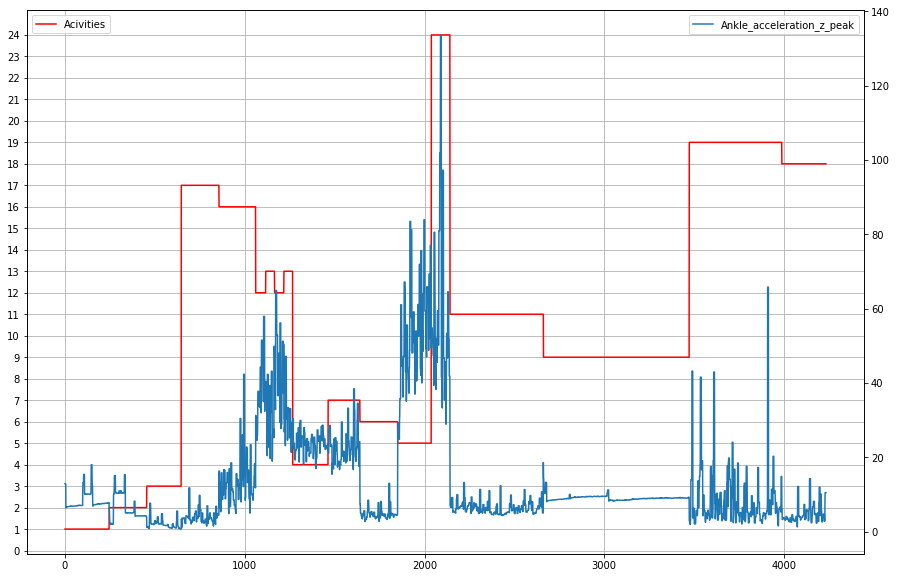

In [16]:
fig, ax1 = plt.subplots(figsize=(15,10))
X = np.array(subject_1.index)
Y1 = subject_1['activityID_mean'].values
Y2 = subject_1['ankle_acc16g_z_peak'].values
ax1.plot(X,Y1,'r-',label='Acivities')
ax1.yaxis.set_ticks(np.arange(0, 25, 1))
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.plot(X,Y2,label='Ankle_acceleration_z_peak')
ax2.legend(loc='upper right')
ax1.grid()

We can definitely see some variation amongst activities, athough the situation is complicated! Some activities have much more variation than others, which suggests that frequency features might be useful here

### Compare the distribution of feature values for different activities

In [7]:
#dictionary converting activity id to activity name#dictiona 
activity_dict={0:'other',1:'lying',2:'sitting',3:'standing',4:'walking',5:'running',6:'cycling',7:'nordic walking',
              9:'watching TV',10:'computer work',11:'car driving',12:'ascending stairs',13:'descending stairs',
              16:'vacuum cleaning',17:'ironing',18:'folding laundry',19:'house cleaning',20:'playing_soccer',
              24:'rope jumping'}

### Start by comparing two very different activities: 'running' (5) vs 'sitting' (2)

In [37]:
activity2 = feature_df[feature_df['activityID_mean'] == 2]
activity5 = feature_df[feature_df['activityID_mean'] == 5]

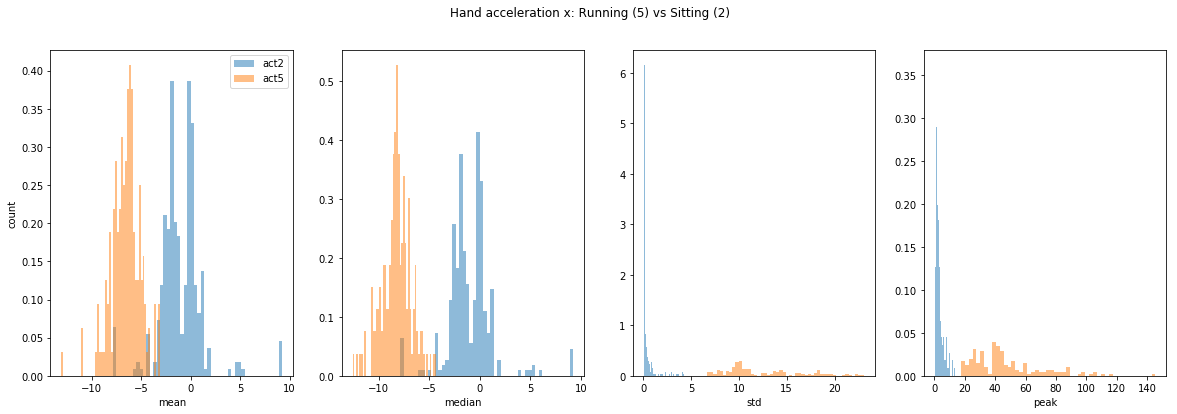

In [38]:
fig = plt.figure(figsize=[20, 6],facecolor='white')
fig.add_subplot(141)
plt.hist(activity2['hand_acc16g_x_mean'], bins=50, label='act2', alpha=0.5, normed=True)
plt.hist(activity5['hand_acc16g_x_mean'], bins=50, label='act5', alpha=0.5, normed=True)
plt.xlabel('mean')
plt.ylabel('count')
plt.legend()
fig.add_subplot(142)
plt.hist(activity2['hand_acc16g_x_median'], bins=50, alpha=0.5, normed=True)
plt.hist(activity5['hand_acc16g_x_median'], bins=50, alpha=0.5, normed=True)
plt.xlabel('median')
fig.add_subplot(143)
plt.hist(activity2['hand_acc16g_x_std'], bins=50, alpha=0.5, normed=True)
plt.hist(activity5['hand_acc16g_x_std'], bins=50, alpha=0.5, normed=True)
plt.xlabel('std')
fig.add_subplot(144)
plt.hist(activity2['hand_acc16g_x_peak'], bins=50, alpha=0.5, normed=True)
plt.hist(activity5['hand_acc16g_x_peak'], bins=50, alpha=0.5, normed=True)
plt.xlabel('peak')
fig.suptitle('Hand acceleration x: Running (5) vs Sitting (2)')
plt.show()


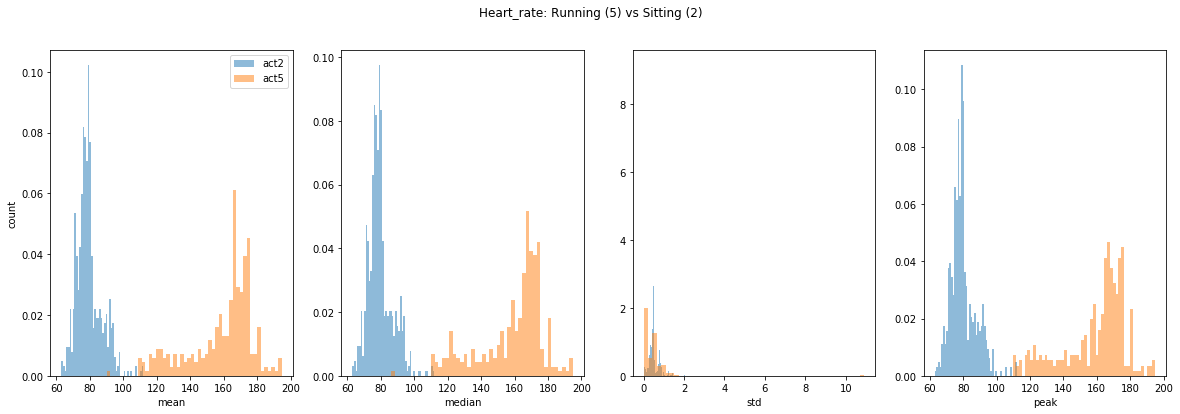

In [12]:
fig = plt.figure(figsize=[20, 6],facecolor='white')
fig.add_subplot(141)
plt.hist(activity2['heart_rate_mean'], bins=50, label='act2', alpha=0.5, normed=True)
plt.hist(activity5['heart_rate_mean'], bins=50, label='act5', alpha=0.5, normed=True)
plt.xlabel('mean')
plt.ylabel('count')
plt.legend()
fig.add_subplot(142)
plt.hist(activity2['heart_rate_median'], bins=50, alpha=0.5, normed=True)
plt.hist(activity5['heart_rate_median'], bins=50, alpha=0.5, normed=True)
plt.xlabel('median')
fig.add_subplot(143)
plt.hist(activity2['heart_rate_std'], bins=50, alpha=0.5, normed=True)
plt.hist(activity5['heart_rate_std'], bins=50, alpha=0.5, normed=True)
plt.xlabel('std')
fig.add_subplot(144)
plt.hist(activity2['heart_rate_peak'], bins=50, alpha=0.5, normed=True)
plt.hist(activity5['heart_rate_peak'], bins=50, alpha=0.5, normed=True)
plt.xlabel('peak')
fig.suptitle('Heart_rate: Running (5) vs Sitting (2)')
plt.show()

### Now compare two similar activities: 'watching TV' (9) vs 'sitting' (2)

In [14]:
activity9 = feature_df[feature_df['activityID_mean'] == 9]

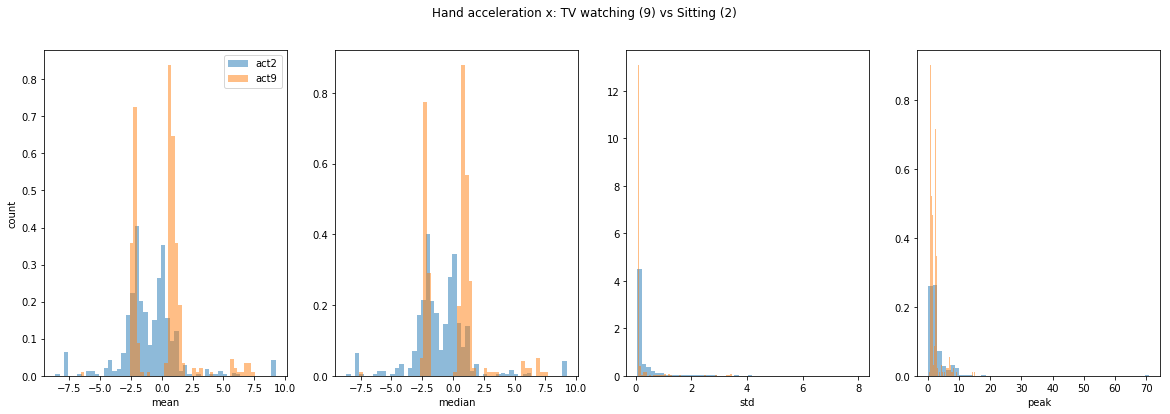

In [15]:
fig = plt.figure(figsize=[20, 6],facecolor='white')
fig.add_subplot(141)
plt.hist(activity2['hand_acc16g_x_mean'], bins=50, label='act2', alpha=0.5, normed=True)
plt.hist(activity9['hand_acc16g_x_mean'], bins=50, label='act9', alpha=0.5, normed=True)
plt.xlabel('mean')
plt.ylabel('count')
plt.legend()
fig.add_subplot(142)
plt.hist(activity2['hand_acc16g_x_median'], bins=50, alpha=0.5, normed=True)
plt.hist(activity9['hand_acc16g_x_median'], bins=50, alpha=0.5, normed=True)
plt.xlabel('median')
fig.add_subplot(143)
plt.hist(activity2['hand_acc16g_x_std'], bins=50, alpha=0.5, normed=True)
plt.hist(activity9['hand_acc16g_x_std'], bins=50, alpha=0.5, normed=True)
plt.xlabel('std')
fig.add_subplot(144)
plt.hist(activity2['hand_acc16g_x_peak'], bins=50, alpha=0.5, normed=True)
plt.hist(activity9['hand_acc16g_x_peak'], bins=50, alpha=0.5, normed=True)
plt.xlabel('peak')
fig.suptitle('Hand acceleration x: TV watching (9) vs Sitting (2)')
plt.show()

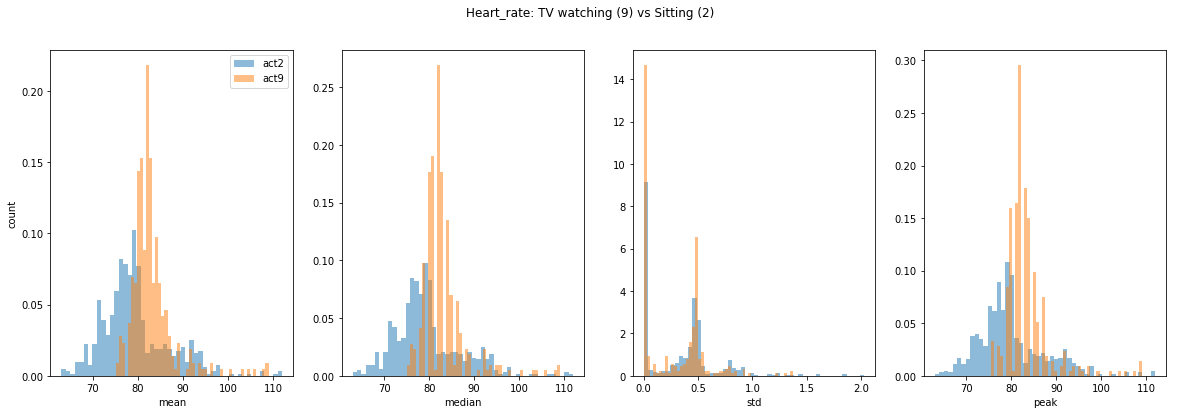

In [16]:
fig = plt.figure(figsize=[20, 6],facecolor='white')
fig.add_subplot(141)
plt.hist(activity2['heart_rate_mean'], bins=50, label='act2', alpha=0.5, normed=True)
plt.hist(activity9['heart_rate_mean'], bins=50, label='act9', alpha=0.5, normed=True)
plt.xlabel('mean')
plt.ylabel('count')
plt.legend()
fig.add_subplot(142)
plt.hist(activity2['heart_rate_median'], bins=50, alpha=0.5, normed=True)
plt.hist(activity9['heart_rate_median'], bins=50, alpha=0.5, normed=True)
plt.xlabel('median')
fig.add_subplot(143)
plt.hist(activity2['heart_rate_std'], bins=50, alpha=0.5, normed=True)
plt.hist(activity9['heart_rate_std'], bins=50, alpha=0.5, normed=True)
plt.xlabel('std')
fig.add_subplot(144)
plt.hist(activity2['heart_rate_peak'], bins=50, alpha=0.5, normed=True)
plt.hist(activity9['heart_rate_peak'], bins=50, alpha=0.5, normed=True)
plt.xlabel('peak')
fig.suptitle('Heart_rate: TV watching (9) vs Sitting (2)')
plt.show()

Its interesting (and makes sense) that TV watchers have slightly elevated heart rates to 'sitters'

### An example classification problem

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [52]:
feature_df.dropna(inplace=True)

In [53]:
activities = pd.get_dummies(feature_df['activityID_mean'],drop_first=True)

In [54]:
X = feature_df.drop(['timestamp_mean','activityID_mean'],axis=1)

In [55]:
X.columns

Index(['heart_rate_mean', 'hand_temp_mean', 'hand_acc16g_x_mean',
       'hand_acc16g_y_mean', 'hand_acc16g_z_mean', 'hand_gyro_x_mean',
       'hand_gyro_y_mean', 'hand_gyro_z_mean', 'chest_temp_mean',
       'chest_acc16g_x_mean', 'chest_acc16g_y_mean', 'chest_acc16g_z_mean',
       'chest_gyro_x_mean', 'chest_gyro_y_mean', 'chest_gyro_z_mean',
       'ankle_temp_mean', 'ankle_acc16g_x_mean', 'ankle_acc16g_y_mean',
       'ankle_acc16g_z_mean', 'ankle_gyro_x_mean', 'ankle_gyro_y_mean',
       'ankle_gyro_z_mean', 'subject_mean', 'heart_rate_median',
       'hand_temp_median', 'hand_acc16g_x_median', 'hand_acc16g_y_median',
       'hand_acc16g_z_median', 'hand_gyro_x_median', 'hand_gyro_y_median',
       'hand_gyro_z_median', 'chest_temp_median', 'chest_acc16g_x_median',
       'chest_acc16g_y_median', 'chest_acc16g_z_median', 'chest_gyro_x_median',
       'chest_gyro_y_median', 'chest_gyro_z_median', 'ankle_temp_median',
       'ankle_acc16g_x_median', 'ankle_acc16g_y_median',
      

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X,activities,test_size=0.3)

In [57]:
dtree = DecisionTreeClassifier(min_samples_leaf=1)

In [58]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [59]:
predictions = dtree.predict(X_test)

In [60]:
from sklearn.metrics import classification_report

In [61]:
print(classification_report(y_test,predictions,digits=4))

             precision    recall  f1-score   support

          0     0.8990    0.9271    0.9128        96
          1     0.9140    0.9444    0.9290        90
          2     0.9643    0.9783    0.9712       138
          3     0.9216    0.9216    0.9216        51
          4     0.9419    0.9000    0.9205        90
          5     0.9604    0.9798    0.9700        99
          6     1.0000    0.9474    0.9730        38
          7     0.9882    0.9941    0.9912       169
          8     0.9000    0.9643    0.9310        28
          9     0.8421    0.9412    0.8889        34
         10     0.8438    0.9310    0.8852        29
         11     0.8557    0.9022    0.8783        92
         12     0.8934    0.8385    0.8651       130
         13     0.7059    0.8571    0.7742        42
         14     0.8947    0.8173    0.8543       104
         15     0.8077    0.6774    0.7368        31
         16     1.0000    0.8000    0.8889        25

avg / total     0.9171    0.9160    0.9154  

#### A really basic case of LOSO - remove one subject, train on the rest and then test

In [143]:
s1 = X[X['subject_mean']==1]

In [144]:
X_without  = X[X['subject_mean'] != 1]
fdf_without = feature_df[feature_df['subject_mean'] != 1]
activities = pd.get_dummies(fdf_without['activityID_mean'],drop_first=True)

In [145]:
dtree.fit(X_without,activities)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [146]:
predictions = dtree.predict(s1)

In [148]:
a1 = feature_df[feature_df['subject_mean'] == 1]
test_activities = pd.get_dummies(a1['activityID_mean'],drop_first=True)

In [149]:
print(classification_report(test_activities,predictions,digits=4))

             precision    recall  f1-score   support

          0     0.1980    0.4689    0.2784       209
          1     0.5261    0.5781    0.5509       192
          2     0.8455    0.9442    0.8921       197
          3     1.0000    1.0000    1.0000       187
          4     0.5517    0.6857    0.6115       210
          5     1.0000    0.7175    0.8355       177
          6     0.0000    0.0000    0.0000       811
          7     0.0000    0.0000    0.0000       520
          8     0.0000    0.0000    0.0000       108
          9     0.0000    0.0000    0.0000        98
         10     0.0000    0.0000    0.0000       204
         11     0.8587    0.7524    0.8020       210
         12     0.0000    0.0000    0.0000       246
         13     0.0000    0.0000    0.0000       515
         14     1.0000    1.0000    1.0000       104

avg / total     0.2691    0.2796    0.2697      3988



The mean of the non-zero components here is 0.75

There could be an issue with the features having been calculated on overlapping segments of timeseries - should investiage what happens in the case of nonoverlapping segments